# Life Expectacy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import pingouin as pg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

 # Clean data

In [2]:
life = pd.read_csv('D:\\Users\\Desktop\\Python code\\GitHub\\Flowstateofmind\\Data\\csv\\LifeExpectancy.csv')
print(life.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [3]:
print(life.isna().sum())

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64


In [4]:
life.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [5]:
life[['Adult_mortality', 'Infant_deaths', 'Under_five_deaths']] = life[['Adult_mortality', 'Infant_deaths', 'Under_five_deaths']] / 10
print(life.head())

   Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           1.11               1.30   
1    Spain  European Union  2015           0.27               0.33   
2    India            Asia  2007           5.15               6.79   
3   Guyana   South America  2006           3.28               4.05   
4   Israel     Middle East  2012           0.34               0.43   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         10.58240                 1.32           97       65  27.8  ...   
1          5.79025                10.35           97       94  26.0  ...   
2         20.10765                 1.57           60       35  21.2  ...   
3         22.21965                 5.68           93       74  25.3  ...   
4          5.79510                 2.89           97       89  27.0  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08           11006           78.

# Explore data

In [6]:
min_year = life['Year'].min()
max_year = life['Year'].max()
print('Time frame of this data : {}-{}'.format(min_year, max_year))

region = life['Region'].unique()
print('Regions in this data : ', region)

print('Country in North America : ')
print(life[life['Region'] == 'North America']['Country'].unique())
print('Country in Asia : ')
print(life[life['Region'] == 'Asia']['Country'].unique())

print('Consist of ', len(life['Country'].unique()))

Time frame of this data : 2000-2015
Regions in this data :  ['Middle East' 'European Union' 'Asia' 'South America'
 'Central America and Caribbean' 'Rest of Europe' 'Africa' 'Oceania'
 'North America']
Country in North America : 
['Mexico' 'United States' 'Canada']
Country in Asia : 
['India' 'Japan' 'Philippines' 'Kazakhstan' 'Bhutan' 'Singapore'
 'Kyrgyz Republic' 'Brunei Darussalam' 'Nepal' 'Afghanistan' 'Azerbaijan'
 'Maldives' 'Tajikistan' 'Pakistan' 'Cambodia' 'Malaysia' 'Vietnam'
 'Bangladesh' 'China' 'Myanmar' 'Mongolia' 'Thailand' 'Lao PDR'
 'Turkmenistan' 'Indonesia' 'Sri Lanka' 'Uzbekistan']
Consist of  179


In [7]:
 # สำรวจว่าข้อมูลในแต่ละปี มีประเทศที่เหมือนและเท่ากันไหม
groupyears = life.groupby('Year')['Country'].value_counts()
print(groupyears)
groupyears = groupyears.unstack()
print(groupyears)
missing_country = []
for index, rows in groupyears.iterrows() :
    for col in groupyears.columns : 
        if groupyears.loc[index, col] != 1 :
            missing_country.append([index, col])
        else :
            None
print('Positions in dataframe where have missing country in each year : ', missing_country)

Year  Country            
2000  Afghanistan            1
      Albania                1
      Algeria                1
      Angola                 1
      Antigua and Barbuda    1
                            ..
2015  Venezuela, RB          1
      Vietnam                1
      Yemen, Rep.            1
      Zambia                 1
      Zimbabwe               1
Name: Country, Length: 2864, dtype: int64
Country  Afghanistan  Albania  Algeria  Angola  Antigua and Barbuda  \
Year                                                                  
2000               1        1        1       1                    1   
2001               1        1        1       1                    1   
2002               1        1        1       1                    1   
2003               1        1        1       1                    1   
2004               1        1        1       1                    1   
2005               1        1        1       1                    1   
2006               1   

# Introduction

* One interesting data science project that can be developed from this data is to build a model to predict the life expectancy of people in different countries. Life expectancy is a key indicator of the overall health and well-being of a population and is influenced by various factors such as healthcare infrastructure, disease prevalence, socio-economic status, and environmental factors.

* To build such a model, you can use machine learning algorithms such as linear regression, decision tree, or random forest to identify the key factors that impact life expectancy and develop a predictive model. Some potential features to consider for the model could be infant and under-five mortality rates, adult mortality, alcohol consumption, incidence of HIV, GDP per capita, population, schooling, and economic status.

* The model can then be used to identify countries with low life expectancy and develop targeted interventions to improve the health outcomes in those countries. It can also be used to compare the performance of different countries and identify best practices that can be adopted by other countries. Finally, the model can be updated periodically with new data to ensure its accuracy and relevance over time.

### objective 
- Hypothesis 1 : The average life expectancy around the world in 2015 is not significantly different from the average life expectancy in 2000.
that the average life expectancy around the world in 2015 is not significantly different from the average life expectancy in 2000. This hypothesis suggests that there may not be any significant improvement in global life expectancy over the 15-year period between 2000 and 2015. the data can be analyzed using a t-test or another statistical test appropriate for the data distribution. If the test results in a p-value greater than the significance level (typically 0.05), then the null hypothesis cannot be rejected, and it can be concluded that there is no significant difference in life expectancy between 2000 and 2015.

- Hypothesis 2 : Higher alcohol consumption is correlated with higher adult mortality rate.
This hypothesis suggests that there may be a correlation between alcohol consumption and adult mortality rate. Data on alcohol consumption and adult mortality rate can be analyzed using statistical techniques such as correlation analysis to determine if there is a significant relationship between these variables. The results can provide insights into the potential impact of alcohol consumption on adult mortality and inform public health policies related to alcohol consumption and its effects on health outcomes.

- Hypothesis 3 : Higher GDP per capita is associated with lower infant and under-five mortality rates.
This hypothesis suggests that there may be an association between a country's GDP per capita and its infant and under-five mortality rates. Statistical analysis, such as regression analysis, can be used to investigate this hypothesis and assess the strength and direction of the relationship between GDP per capita and infant/under-five mortality rates. The findings can provide insights into the role of economic development in improving child health outcomes and inform policies aimed at reducing infant and under-five mortality rates.

# Hypothesis

 1. Null : The average life expectancy around the world in 2015 is not significantly different from the average life expectancy in 2000.


In [8]:
average_timeline = life.groupby('Year')['Life_expectancy'].mean()
print('Average life expectancy around the world, since 2000-2015.')
print(average_timeline)
average_compare = life[life['Year'].isin([2000, 2015])].groupby(['Year', 'Region','Country'])['Life_expectancy'].median()
print('Average life expectancy comparison between 2000 and 2015 of each area.')
print(average_compare)

Average life expectancy around the world, since 2000-2015.
Year
2000    66.360335
2001    66.650279
2002    66.886592
2003    67.170391
2004    67.549721
2005    67.856425
2006    68.221788
2007    68.588268
2008    68.991061
2009    69.388827
2010    69.777095
2011    70.177095
2012    70.521788
2013    70.877095
2014    71.216760
2015    71.463687
Name: Life_expectancy, dtype: float64
Average life expectancy comparison between 2000 and 2015 of each area.
Year  Region         Country      
2000  Africa         Algeria          70.6
                     Angola           46.5
                     Benin            55.4
                     Botswana         50.6
                     Burkina Faso     50.5
                                      ... 
2015  South America  Paraguay         73.7
                     Peru             75.8
                     Suriname         71.2
                     Uruguay          77.4
                     Venezuela, RB    72.6
Name: Life_expectancy, Length: 

In [9]:
average_timeline = life.groupby('Year')['Life_expectancy'].mean()
print('Average life expectancy around the world, since 2000-2015.')
print(average_timeline)
average_compare = life[life['Year'].isin([2000, 2015])].groupby(['Year', 'Region','Country'])['Life_expectancy'].median()
print('Average life expectancy comparison between 2000 and 2015 of each area.')
print(average_compare)

Average life expectancy around the world, since 2000-2015.
Year
2000    66.360335
2001    66.650279
2002    66.886592
2003    67.170391
2004    67.549721
2005    67.856425
2006    68.221788
2007    68.588268
2008    68.991061
2009    69.388827
2010    69.777095
2011    70.177095
2012    70.521788
2013    70.877095
2014    71.216760
2015    71.463687
Name: Life_expectancy, dtype: float64
Average life expectancy comparison between 2000 and 2015 of each area.
Year  Region         Country      
2000  Africa         Algeria          70.6
                     Angola           46.5
                     Benin            55.4
                     Botswana         50.6
                     Burkina Faso     50.5
                                      ... 
2015  South America  Paraguay         73.7
                     Peru             75.8
                     Suriname         71.2
                     Uruguay          77.4
                     Venezuela, RB    72.6
Name: Life_expectancy, Length: 

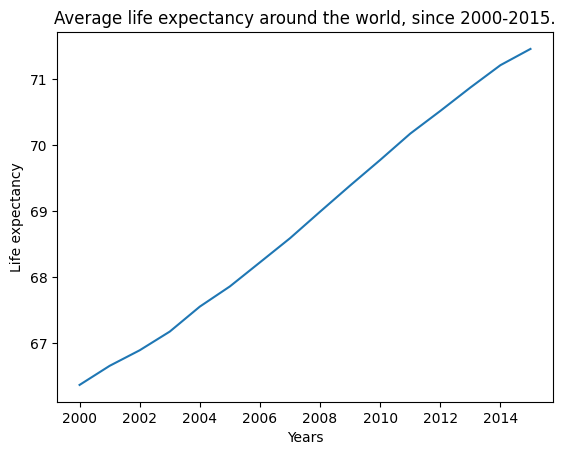

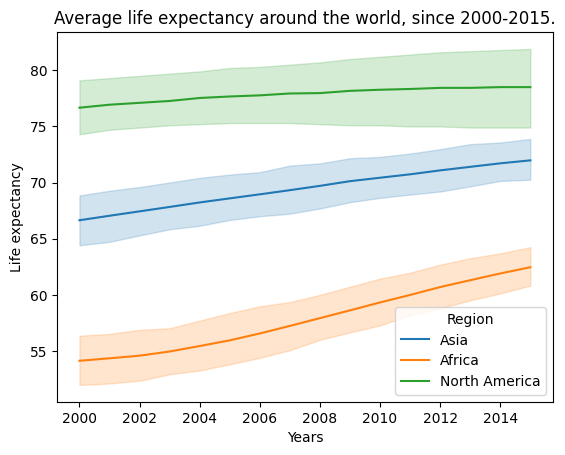

In [10]:
sns.lineplot(data = average_timeline)
plt.xlabel('Years')
plt.ylabel('Life expectancy')
plt.title('Average life expectancy around the world, since 2000-2015.')
plt.show()

sns.lineplot(data = life[life['Region'].isin(['Africa', 'Asia', 'North America'])], x = 'Year', y = 'Life_expectancy', hue = 'Region')
plt.xlabel('Years')
plt.ylabel('Life expectancy')
plt.title('Average life expectancy around the world, since 2000-2015.')
plt.show()

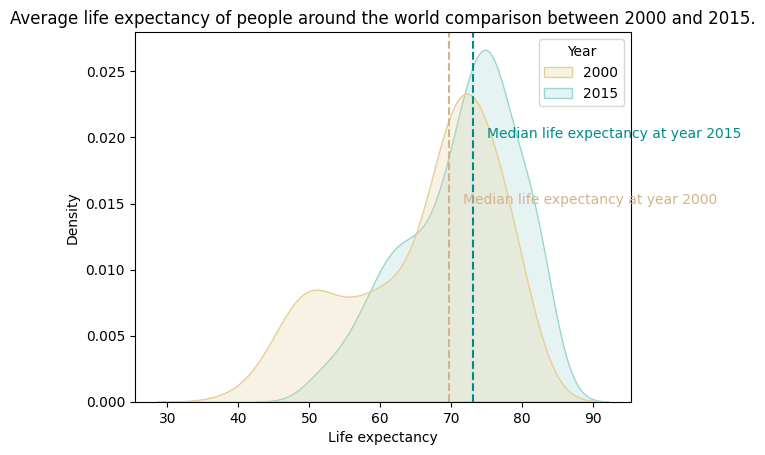

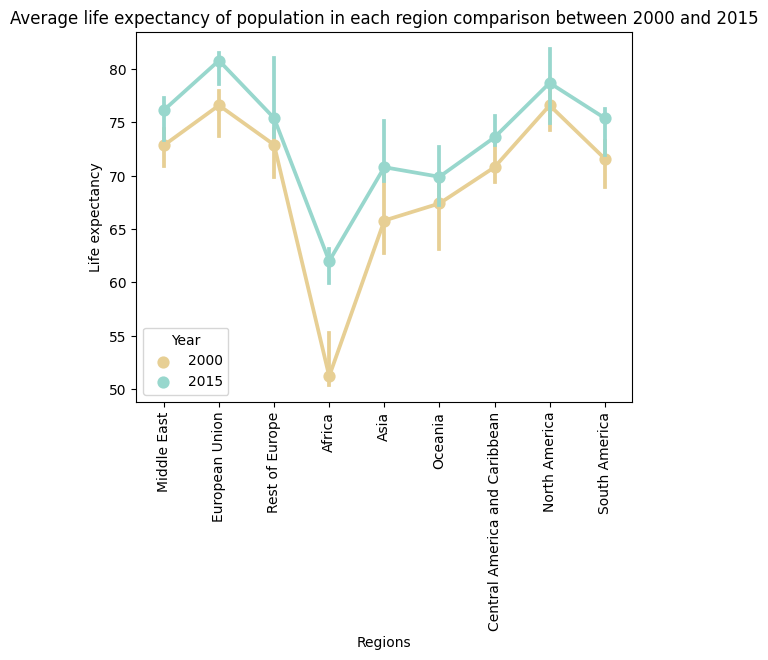

In [11]:
sns.kdeplot(data = life[life['Year'].isin([2000, 2015])], x = 'Life_expectancy', hue = 'Year', fill = True, palette = sns.color_palette('BrBG', 2))
plt.axvline(x = life[life['Year'] == 2000]['Life_expectancy'].median(), linestyle = '--', color = 'tan')
plt.axvline(x = life[life['Year'] == 2015]['Life_expectancy'].median(), linestyle = '--', color = 'darkcyan')
plt.text(life[life['Year'] == 2000]['Life_expectancy'].median() + 2, y = 0.015, s = 'Median life expectancy at year 2000', color = 'tan')
plt.text(life[life['Year'] == 2015]['Life_expectancy'].median() + 2, y = 0.020, s = 'Median life expectancy at year 2015', color = 'darkcyan')
plt.xlabel('Life expectancy')
plt.title('Average life expectancy of people around the world comparison between 2000 and 2015.')
plt.show()

sns.pointplot(data = life[life['Year'].isin([2000, 2015])], x = 'Region', y = 'Life_expectancy', hue = 'Year', estimator = np.median, palette = sns.color_palette('BrBG', 2))
plt.xlabel('Regions')
plt.ylabel('Life expectancy')
plt.xticks(rotation = 90)
plt.title('Average life expectancy of population in each region comparison between 2000 and 2015')
plt.show()

In [12]:
stat, pvalue = stats.wilcoxon(life[life['Year'] == 2015]['Life_expectancy'], life[life['Year'] == 2000]['Life_expectancy'])
print('There is significant difference between life expectancy of people around the world in year 2015 compared with 2000.')
print('Mean difference : ', life[life['Year'] == 2015]['Life_expectancy'].median() - life[life['Year'] == 2000]['Life_expectancy'].median(), 'years.')
print('P-value : ', pvalue)

There is significant difference between life expectancy of people around the world in year 2015 compared with 2000.
Mean difference :  3.299999999999997 years.
P-value :  6.839947297761771e-06


2. Null : Higher alcohol consumption is correlated with higher adult mortality rate.

In [13]:
alc_mortal = life[['Year', 'Region', 'Country', 'Adult_mortality', 'Alcohol_consumption']]
print(alc_mortal)
print("Adult mortality rate : Probability of dying between 15 and 60 years.")
print("Alcohol consumption : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).")

      Year          Region    Country  Adult_mortality  Alcohol_consumption
0     2015     Middle East    Turkiye         10.58240                1.320
1     2015  European Union      Spain          5.79025               10.350
2     2007            Asia      India         20.10765                1.570
3     2006   South America     Guyana         22.21965                5.680
4     2012     Middle East     Israel          5.79510                2.890
...    ...             ...        ...              ...                  ...
2859  2000          Africa      Niger         29.18240                0.092
2860  2009            Asia   Mongolia         23.52330                6.560
2861  2004            Asia  Sri Lanka         13.48950                1.560
2862  2002  European Union  Lithuania         20.40120               11.000
2863  2011  Rest of Europe    Iceland          5.05745                6.840

[2864 rows x 5 columns]
Adult mortality rate : Probability of dying between 15 and 60 y

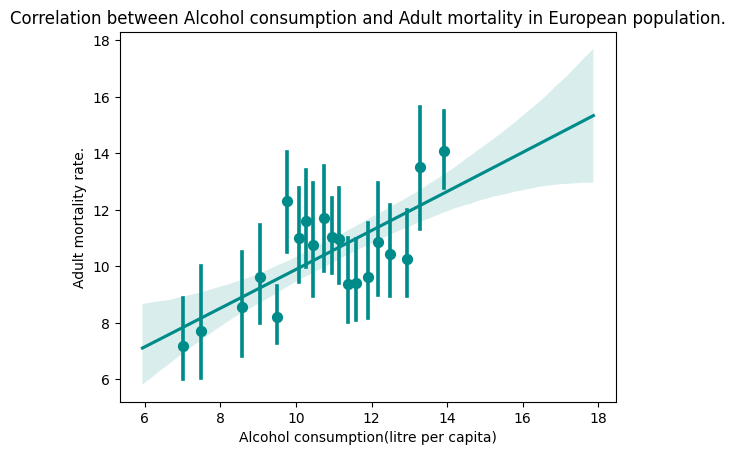

In [14]:
sns.regplot(data = alc_mortal[alc_mortal['Region'] == 'European Union'], x = 'Alcohol_consumption', y = 'Adult_mortality', order = 2, x_bins = 20, color = 'darkcyan')
plt.title('Correlation between Alcohol consumption and Adult mortality in European population.')
plt.xlabel('Alcohol consumption(litre per capita)')
plt.ylabel('Adult mortality rate.')
plt.show()

In [15]:
alc_mortal_EU = alc_mortal[alc_mortal['Region'] == 'European Union']
corr, pvalue = stats.spearmanr(alc_mortal_EU['Alcohol_consumption'], alc_mortal_EU['Adult_mortality'])
print('There is significant positive correlation between alcohol consumption and adult mortality rate in European population.')
print('Correlation coefficient : ', corr)
print('P-value : ', pvalue)
print('Caution for interpretion : It is important to note that correlation does not necessarily imply causation.')

There is significant positive correlation between alcohol consumption and adult mortality rate in European population.
Correlation coefficient :  0.4081977685418594
P-value :  8.909341339097416e-19
Caution for interpretion : It is important to note that correlation does not necessarily imply causation.


3. Null : Higher GDP per capita is associated with lower infant and under-five mortality rates.

In [16]:
gdp_infant = life.groupby(['Country', 'Year'])[['GDP_per_capita', 'Infant_deaths', 'Under_five_deaths']].mean()
print('GDP per capita and infant & underfive year children mortality rates (per 1000) of countries around the world, since 2000-2015.')
gdp_infant = gdp_infant.reset_index()
print(gdp_infant)

gdp_infant_avg = life.groupby('Country')[['GDP_per_capita', 'Infant_deaths', 'Under_five_deaths']].mean()
print('Average GDP per capita and infant & underfive year children mortality rates (per 1000) of countries around the world, since 2000-2015.')
print(gdp_infant_avg)


GDP per capita and infant & underfive year children mortality rates (per 1000) of countries around the world, since 2000-2015.
          Country  Year  GDP_per_capita  Infant_deaths  Under_five_deaths
0     Afghanistan  2000           148.0           9.05              12.92
1     Afghanistan  2001           163.0           8.79              12.52
2     Afghanistan  2002           320.0           8.53              12.11
3     Afghanistan  2003           332.0           8.27              11.69
4     Afghanistan  2004           323.0           8.00              11.26
...           ...   ...             ...            ...                ...
2859     Zimbabwe  2011          1249.0           5.08               8.08
2860     Zimbabwe  2012          1432.0           4.65               7.22
2861     Zimbabwe  2013          1435.0           4.48               6.63
2862     Zimbabwe  2014          1444.0           4.29               6.27
2863     Zimbabwe  2015          1445.0           4.21     

In [17]:
# Compare Thailand and USA
usa_th_gdp = gdp_infant[gdp_infant['Country'].isin(['United States', 'Thailand'])]
print(usa_th_gdp)

            Country  Year  GDP_per_capita  Infant_deaths  Under_five_deaths
2528       Thailand  2000          3518.0           1.87               2.20
2529       Thailand  2001          3605.0           1.78               2.09
2530       Thailand  2002          3795.0           1.70               1.99
2531       Thailand  2003          4038.0           1.62               1.89
2532       Thailand  2004          4263.0           1.55               1.80
2533       Thailand  2005          4412.0           1.48               1.72
2534       Thailand  2006          4604.0           1.41               1.64
2535       Thailand  2007          4827.0           1.34               1.56
2536       Thailand  2008          4884.0           1.28               1.49
2537       Thailand  2009          4826.0           1.22               1.42
2538       Thailand  2010          5164.0           1.17               1.36
2539       Thailand  2011          5182.0           1.12               1.30
2540       T

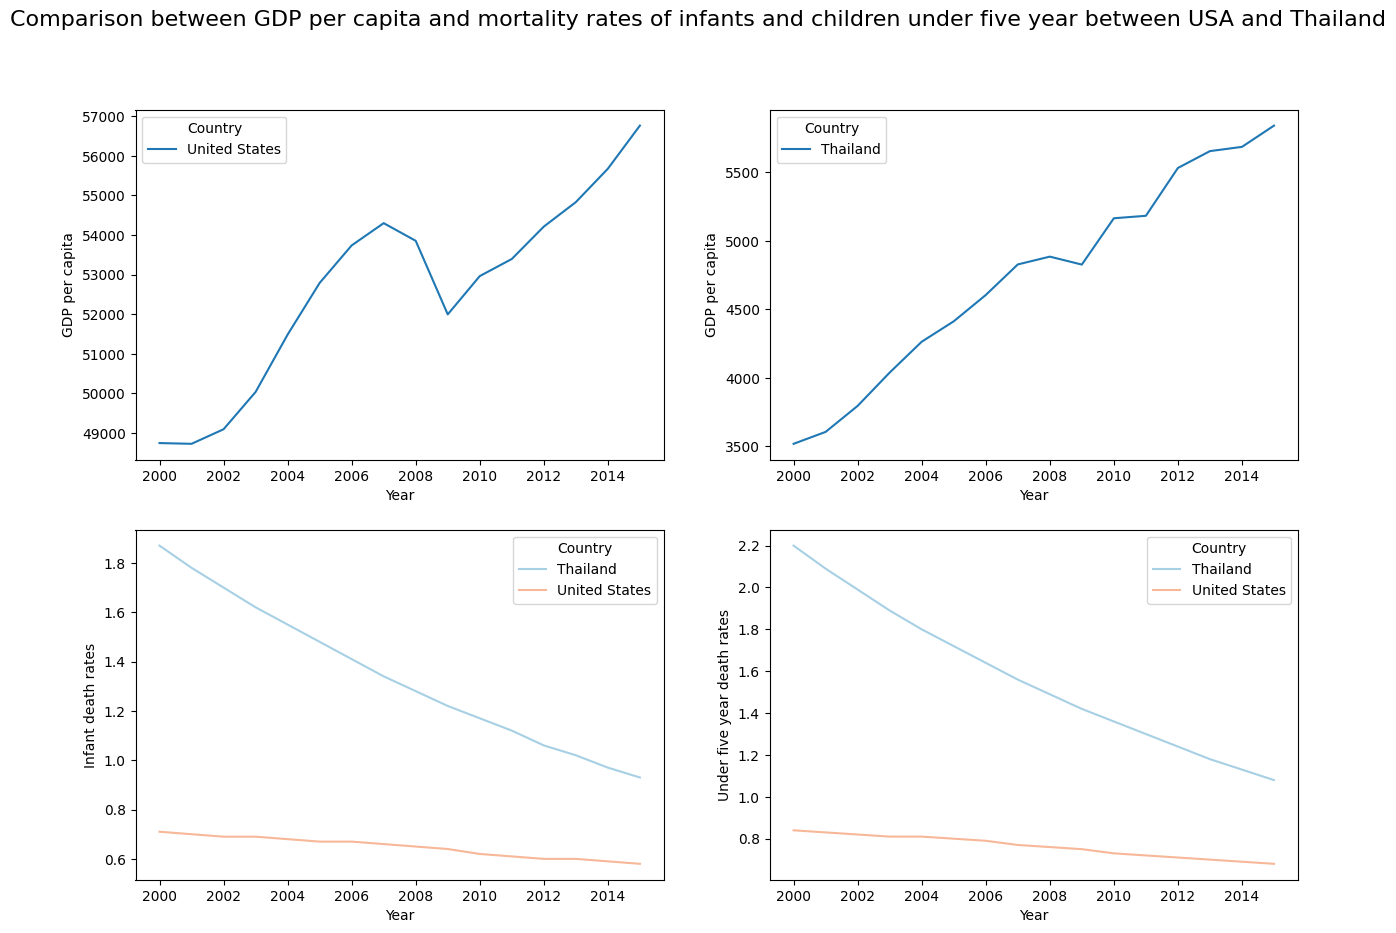

In [18]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows = 2, ncols = 2, sharey = False, figsize = (15, 10))
sns.lineplot(data = usa_th_gdp[usa_th_gdp['Country'] == 'United States'], x = 'Year', y = 'GDP_per_capita', hue = 'Country', ax = ax0, color = 'Red')
ax0.set(ylabel = 'GDP per capita')
sns.lineplot(data = usa_th_gdp[usa_th_gdp['Country'] == 'Thailand'], x = 'Year', y = 'GDP_per_capita', hue = 'Country', ax = ax1, color = 'Blue')
ax1.set(ylabel = 'GDP per capita')

sns.lineplot(data = usa_th_gdp, x = 'Year', y = 'Infant_deaths', hue = 'Country', ax = ax2, palette = sns.color_palette('RdBu', 2)[::-1])
ax2.set(ylabel = 'Infant death rates')
sns.lineplot(data = usa_th_gdp, x = 'Year', y = 'Under_five_deaths', hue = 'Country', ax = ax3, palette = sns.color_palette('RdBu', 2)[::-1])
ax3.set(ylabel = 'Under five year death rates')

fig.suptitle('Comparison between GDP per capita and mortality rates of infants and children under five year between USA and Thailand', fontsize = 16)
plt.show()

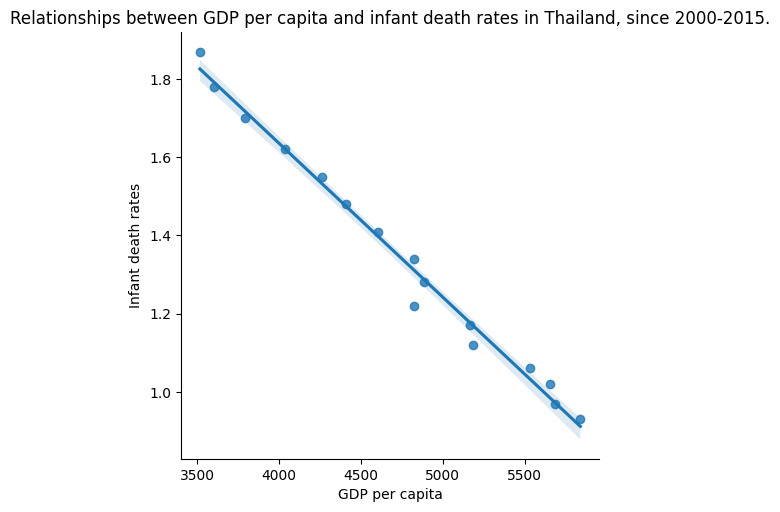

In [19]:
sns.lmplot(data = usa_th_gdp[usa_th_gdp['Country'] == 'Thailand'], x = 'GDP_per_capita', y = 'Infant_deaths')
plt.xlabel('GDP per capita')
plt.ylabel('Infant death rates')
plt.title('Relationships between GDP per capita and infant death rates in Thailand, since 2000-2015.')
plt.show()

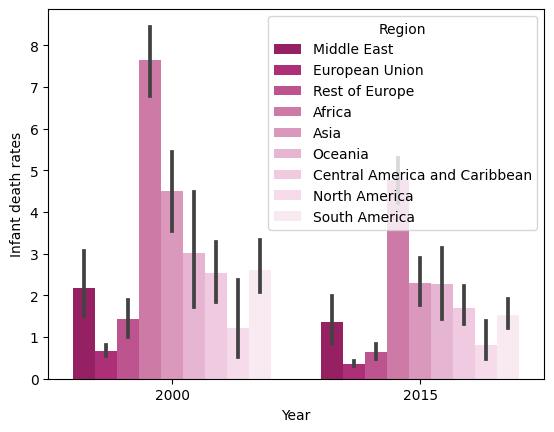

In [20]:
sns.barplot(data = life[life['Year'].isin([2000, 2015])], x = 'Year', y = 'Infant_deaths', hue = 'Region', palette = sns.color_palette('PiYG', 20))
plt.ylabel('Infant death rates')
plt.show()

In [28]:
# show model
th_gdp = usa_th_gdp[usa_th_gdp['Country'] == 'Thailand']
X = th_gdp[['GDP_per_capita']]
Y = th_gdp['Infant_deaths']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result = model.fit()
result = result.summary2()
print('Linear regression model : GDP per capita and Infant death rate prediction.')
print()
print(result)
print()

# train data
X = th_gdp[['GDP_per_capita']]
Y = th_gdp['Infant_deaths']
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size = 0.2, random_state = 123)
model = LinearRegression()
model.fit(X_train, Y_train)

# test data
Y_predict_test = model.predict(X_test) 
mae = mean_absolute_error(Y_test, Y_predict_test)
mse = mean_squared_error(Y_test, Y_predict_test)
rsquare = r2_score(Y_test, Y_predict_test)
print('Mean absolute error : ', mae)
print('Mean squared error : ', mse)
print('R**2_score : ', rsquare)

# predict data 
th_gdp_future = 8000
Y_predict_new = model.predict([[th_gdp_future]])
print('If Thailand GDP per capita in 2016 is {}, the infant death rate in Thailand will be {} in 2016.'.format(th_gdp_future, Y_predict_new))



Linear regression model : GDP per capita and Infant death rate prediction.


Mean absolute error :  0.03459676969975267
Mean squared error :  0.0016768248570455271
R**2_score :  0.9754018541187051
If Thailand GDP per capita in 2016 is 8000, the infant death rate in Thailand will be [0.09035392] in 2016.


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [22]:
# Null : There is no significant difference of Infant death rates between in each region in 2015.
infant_death_2015 = pg.kruskal(data = life[life['Year'] == 2015], dv = 'Infant_deaths', between = 'Region')
print(infant_death_2015)
print('There is significant difference of Infant death rates between in each region in 2015.')


         Source  ddof1          H         p-unc
Kruskal  Region      8  119.08912  5.111630e-22
There is significant difference of Infant death rates between in each region in 2015.
